In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from data_clean import clean_data, get_features, createDataframe

In [2]:
group_size = 200

In [3]:
dataFrames = []

In [4]:
dataFrames.append(createDataframe('raw data/2020-12-10tony650steps.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-10mary1.csv', group_size, 150))
dataFrames.append(createDataframe('raw data/161cm walk1.csv', group_size, 161))
dataFrames.append(createDataframe('raw data/173cm walk1.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/2020-12-10peter166.csv', group_size, 166))
dataFrames.append(createDataframe('raw data/176cm walk.csv', group_size, 176))
dataFrames.append(createDataframe('raw data/173cm walk2.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/173cm walk3.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/2020-12-06walka.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-06walkb.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-10judy153.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10judy2.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10judy3.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10andrew169.csv', group_size, 169))
#dataFrames.append(createDataframe('raw data/180cm walk.csv', group_size, 180))
#dataFrames.append(createDataframe('raw data/2020-12-11daye168.csv', group_size, 168))
#dataFrames.append(createDataframe('raw data/2020-12-11daye2.csv', group_size, 168))
#dataFrames.append(createDataframe('raw data/2020-12-11daye3.csv', group_size, 168))

In [5]:
merged_df = pd.concat(dataFrames)
sampled_df = merged_df

In [6]:
merged_df.count()

speed       77937
distance    77937
steps       77937
time        77937
v3          77937
height      77937
dtype: int64

In [7]:
merged_df.groupby(['height']).count()

,speed,distance,steps,time,v3
height,,,,,
150,2167,2167,2167,2167,2167
153,14945,14945,14945,14945,14945
161,3305,3305,3305,3305,3305
166,22677,22677,22677,22677,22677
169,4014,4014,4014,4014,4014
173,9798,9798,9798,9798,9798
176,6426,6426,6426,6426,6426
178,14605,14605,14605,14605,14605


In [8]:
sampled_df = merged_df.groupby(['height']).sample(10000, replace=True)

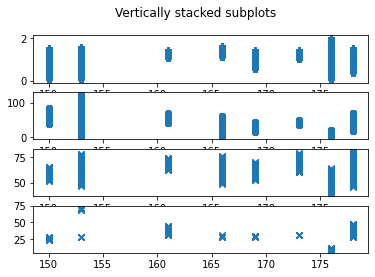

In [9]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(sampled_df['height'], sampled_df['speed'], "*")
axs[1].plot(sampled_df['height'], sampled_df['distance'], "o")
axs[2].plot(sampled_df['height'], sampled_df['steps'], "x")
axs[3].plot(sampled_df['height'], sampled_df['time'], "x")

In [10]:
sampled_df

,speed,distance,steps,time,v3,height
1881,1.452867,41.350885,59.0,28.757,5.730150,150
695,1.438417,47.039209,59.0,28.781,5.598743,150
597,1.476071,44.504774,62.0,28.787,5.488812,150
656,1.448446,45.542814,59.0,28.779,5.558488,150
2412,1.451996,46.812647,64.0,28.780,5.291599,150
...,...,...,...,...,...,...
1938,1.257192,31.637238,48.0,28.783,3.627362,178
1913,1.500396,42.072674,61.0,28.811,4.367128,178
6547,1.392846,42.970872,58.0,28.758,3.543096,178
845,1.231279,47.943319,63.0,35.973,3.718078,178


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pre

X = sampled_df[['speed','distance','steps', 'time', 'v3']].to_numpy()
y = sampled_df['height'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95)

scaler = pre.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline( PolynomialFeatures(10), LinearRegression())
result_poly = poly_model.fit(X_train, y_train)
result_poly.score(X_test, y_test)

0.8971275097709419

(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 4.940e+02,
        9.540e+02, 1.021e+03, 5.030e+02, 9.990e+02]),
 array([-282.33082606, -275.74721413, -269.1636022 , -262.57999028,
        -255.99637835, -249.41276642, -242.82915449, -236.24554257,
        -229.66193064, -223.07831871, -216.49470679, -209.91109486,
        -203.32748293, -196.743871  , -190.16025908, -183.57664715,
        -176.99303522, -170.4094233 , -163.82581137, -157.24219944,
        -150.65858751, -144.07497559, -137.49136366, -130.90775173,
        -124.32413981, -117.74052788, -111.15691595, -104.57330402,
         -97.9896921 ,  -9

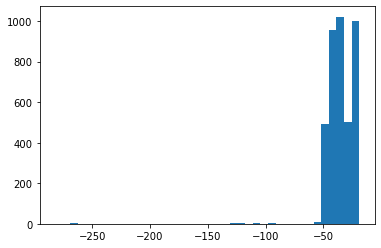

In [18]:
y_predict_poly = result_poly.predict(X_test_scaled)
y_diff_poly = y_predict_poly - y_test
plt.hist(y_diff_poly, bins = 40)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_class = make_pipeline( 
        RandomForestClassifier(n_estimators=400,
        max_depth=15, min_samples_leaf=15)
    )

model_class.fit(X_train_scaled, y_train)
model_class.score(X_test_scaled, y_test)

0.94525

In [20]:
mpl_model = make_pipeline( MLPRegressor(hidden_layer_sizes=(100,100,100)))
result_mpl = mpl_model.fit(X_train_scaled, y_train)
result_mpl.score(X_test_scaled, y_test)

0.9219176996055939

(array([  2.,   0.,   0.,   0.,   3.,   4.,  12.,  20.,   7.,  29.,  24.,
         29.,  47.,  57.,  79., 141., 320., 585., 858., 644., 650., 210.,
         95.,  45.,  19.,  22.,  16.,  18.,  19.,   8.,  14.,   6.,   3.,
          2.,   6.,   3.,   1.,   1.,   0.,   1.]),
 array([-14.94163846, -14.11801669, -13.29439491, -12.47077314,
        -11.64715137, -10.8235296 ,  -9.99990782,  -9.17628605,
         -8.35266428,  -7.52904251,  -6.70542073,  -5.88179896,
         -5.05817719,  -4.23455542,  -3.41093364,  -2.58731187,
         -1.7636901 ,  -0.94006833,  -0.11644655,   0.70717522,
          1.53079699,   2.35441876,   3.17804054,   4.00166231,
          4.82528408,   5.64890585,   6.47252763,   7.2961494 ,
          8.11977117,   8.94339294,   9.76701472,  10.59063649,
         11.41425826,  12.23788003,  13.06150181,  13.88512358,
         14.70874535,  15.53236712,  16.3559889 ,  17.17961067,
         18.00323244]),
 <BarContainer object of 40 artists>)

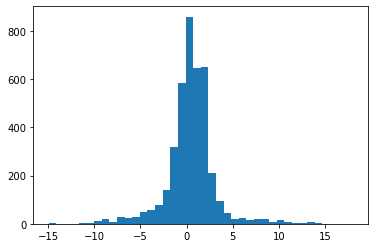

In [21]:
y_predict_mpl = result_mpl.predict(X_test_scaled)
y_diff_mpl = y_predict_mpl - y_test
plt.hist(y_diff_mpl, bins = 40)